# LGMVIP - Data Science Intern

# Task 1 - Iris Flowers Cassification ML Project

# Submitted by - Akash Anand Chaudhare

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
%matplotlib inline

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

<AxesSubplot:>

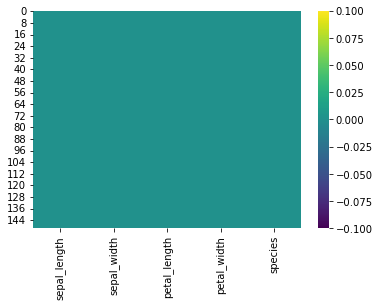

In [5]:
sns.heatmap(df.isnull(),cmap='viridis')

Hence there are no missing values

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
n1 = len(df[df['species'] == 'versicolor'])
n2 = len(df[df['species'] == 'virginica'])
n3 = len(df[df['species'] == 'setosa'])
print("No of Versicolor in Dataset:",n1)
print("No of Virginica in Dataset:",n2)
print("No of Setosa in Dataset:",n3)

No of Versicolor in Dataset: 50
No of Virginica in Dataset: 50
No of Setosa in Dataset: 50


This shows that the number of classes are balanced, there are equal amount of all 3 classes in the dataset

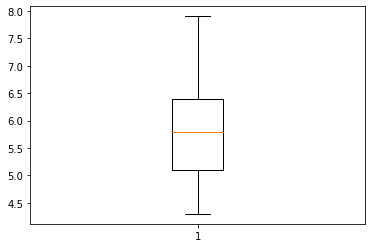

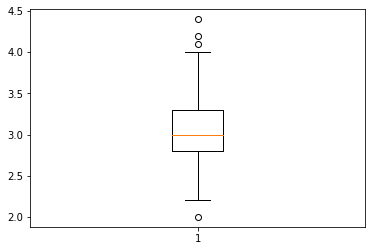

In [9]:
#Checking for outliers
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([df['sepal_length']])
plt.figure(2)
plt.boxplot([df['sepal_width']])
plt.show()

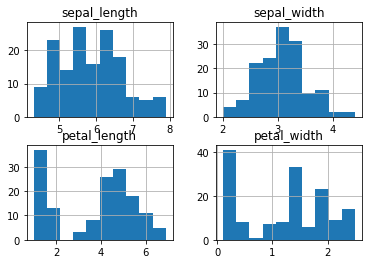

In [10]:
df.hist()
plt.show()

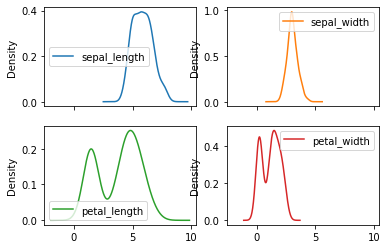

In [11]:
df.plot(kind ='density',subplots = True, layout =(2,2))
plt.show()

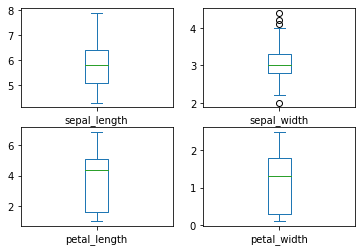

In [12]:
df.plot(kind ='box',subplots = True, layout =(2,2))
plt.show()

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

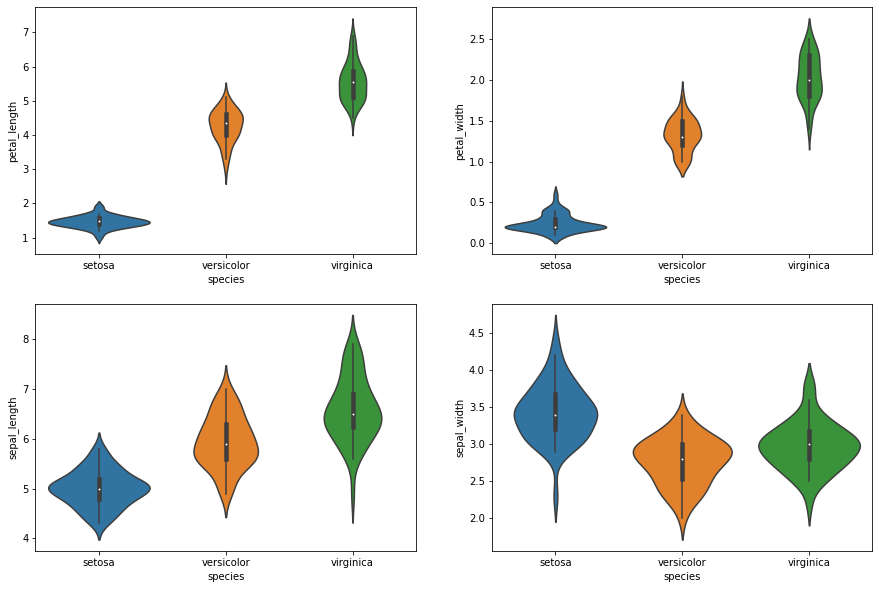

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

### Pairplot for general data overview

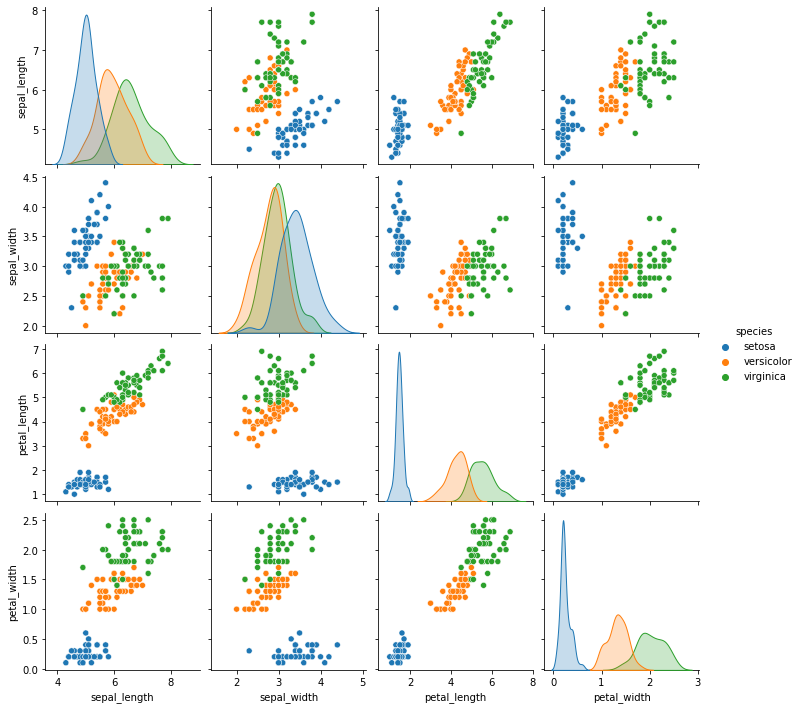

In [14]:
sns.pairplot(df,hue='species');

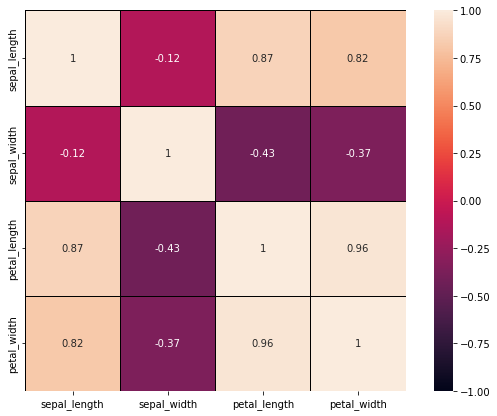

In [15]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar=True)

### Now we fit data to a few models to check for best accuracy

In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
X=df
y=df.pop('species')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [20]:
#Using LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy:',metrics.accuracy_score(prediction,y_test))

Accuracy: 0.9333333333333333


In [21]:
#Confusion matrix
confusion_mat = confusion_matrix(y_test,prediction)
print("Confusion matrix: \n",confusion_mat)
print('---------------------------------------------------------')
print(classification_report(y_test,prediction))

Confusion matrix: 
 [[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]
---------------------------------------------------------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [22]:
#Using Support Vector

from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,y_train)

y_pred1 = model1.predict(X_test)


print("Acc=",accuracy_score(y_test,y_pred1))

Acc= 1.0


In [23]:
#Using KNN Neighbors

from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)


print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.9666666666666667


In [24]:
#Using GaussianNB

from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)


print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.9333333333333333


In [25]:
#Using Decision Tree

model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.9333333333333333


### We compare accuracies of trained models

In [30]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.933,1,0.966,0.933,0.933]})

result_df = results.sort_values(by='Score', ascending=False)
result_df.head(9)

,Model,Score
1,Support Vector Machines,1.000
2,Naive Bayes,0.966
0,Logistic Regression,0.933
3,KNN,0.933
4,Decision Tree,0.933


### Hence we obtained a maximum accuracy of 100% from SVM and 96.6% from Naive Bayes and 93.3% from Logistis Regression, KNN and decision tree